# Beispiel

Üblicherweise werden zunächst die erforderlichen Bibliotheken importiert:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Beispieldaten einlesen

Anschließend lesen wir die csv-Daten in Pandas als DataFrame ein:

In [2]:
df = pd.read_csv('https://s3.amazonaws.com/dq-blog-files/fortune500.csv')

## Daten untersuchen

[pandas.DataFrame.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas-dataframe-head) gibt die ersten Zeilen für das Objekt basierend auf der Position zurück.

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


[pandas.DataFrame.tail](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas-dataframe-tail) gibt die letzten Zeilen des Objekts basierend auf der Position zurück.

In [4]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


### Umbenennen der Spalten

Die Spalten können mit [pandas.DataFrame.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas-dataframe-columns) umbenannt werden. Dadurch können wir später leichter auf die Spalten verweisen. Anschließend überprüfen wir die Änderung mit `df.head()`:

In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
df.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


### Überprüfen der Anzahl der Datensätze

[len](https://docs.python.org/3/library/functions.html#len) gibt die Anzahl der Elemente eines Objekts zurück.

In [6]:
len(df)

25500

Das entspricht 500 Zeilen pro Jahr von 1955 bis einschließlich 2005.

### Überprüfen der Datentypen

[pandas.dataframe.dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html#pandas-dataframe-dtypes) gibt die Datentypen im DataFrame zurück.

In [7]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

Die Spalte `profit` sollte vom Datentyp `float64` sein; das ist hier nicht der Fall. Dies weist darauf hin, dass die Spalte wahrscheinlich einige Werte enthält, die keine Zahlen sind. Überprüfen wir dies mit einem regulären Ausdruck:

In [8]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')

df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Ob es neben `N.A.` noch andere nichtnumerische Werte gibt, überprüfen wir mit

In [9]:
set(df.profit[non_numeric_profits])

{'N.A.'}

Als nächstes untersuchen wir, wie viele Datensätze davon betroffen sind:

In [10]:
len(df.profit[non_numeric_profits])

369

… und wie sie sich über die Jahre verteilen:

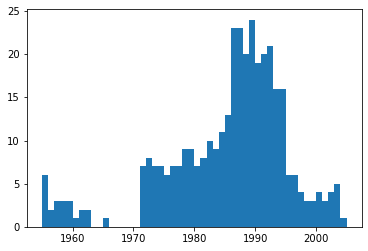

In [11]:
bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], bins=range(1955, 2006))

Hier können wir sehen, dass die problematischen Datenpunkte in einem Jahr 24 nicht überschreiten und bei 500 Datenpunkte pro Jahr würde das Entfernen dieser Werte weniger als 5% der Daten für dieses Jahr ausmachen. Nehmen wir an, dass es für uns akzeptabel ist, dass die problematischen Daten entfernt werden können:

In [12]:
df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)

Wir sollten nun `25500 - 369` Datensätze haben:

In [13]:
len(df)

25131

… und für die Spalte `profit` sollte der Datentyp nun `float64` sein:

In [14]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object